In [73]:
set.seed(1113)
sample(c("Axel","Mike","Markus"))

[1] "Axel"   "Markus" "Mike"

In [79]:
set.seed(1214)
sample(c("Axel","Mike","Markus"), size=1)

[1] "Mike"

In [3]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [28]:
options(repr.plot.width=14, repr.plot.res=300)

In [9]:
cpu <- read_tsv("cpu.tsv") %>% mutate(timestamp = ymd_hms(timestamp))

Rows: 346230 Columns: 10


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): hostname, timestamp
dbl (8): interval, CPU, %user, %nice, %system, %iowait, %steal, %idle



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
head(cpu)

hostname,interval,timestamp,CPU,%user,%nice,%system,%iowait,%steal,%idle
<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gaia2,60,2024-03-01 09:45:27,-1,1.05,0,2.62,0.09,0,96.23
gaia2,60,2024-03-01 09:46:27,-1,1.33,0,2.92,0.16,0,95.60
gaia2,60,2024-03-01 09:47:27,-1,1.47,0,2.98,0.16,0,95.38
gaia2,60,2024-03-01 09:48:27,-1,1.65,0,3.25,0.09,0,95.01
gaia2,60,2024-03-01 09:49:27,-1,1.05,0,2.42,0.06,0,96.47
gaia2,60,2024-03-01 09:50:27,-1,1.38,0,2.22,0.06,0,96.34


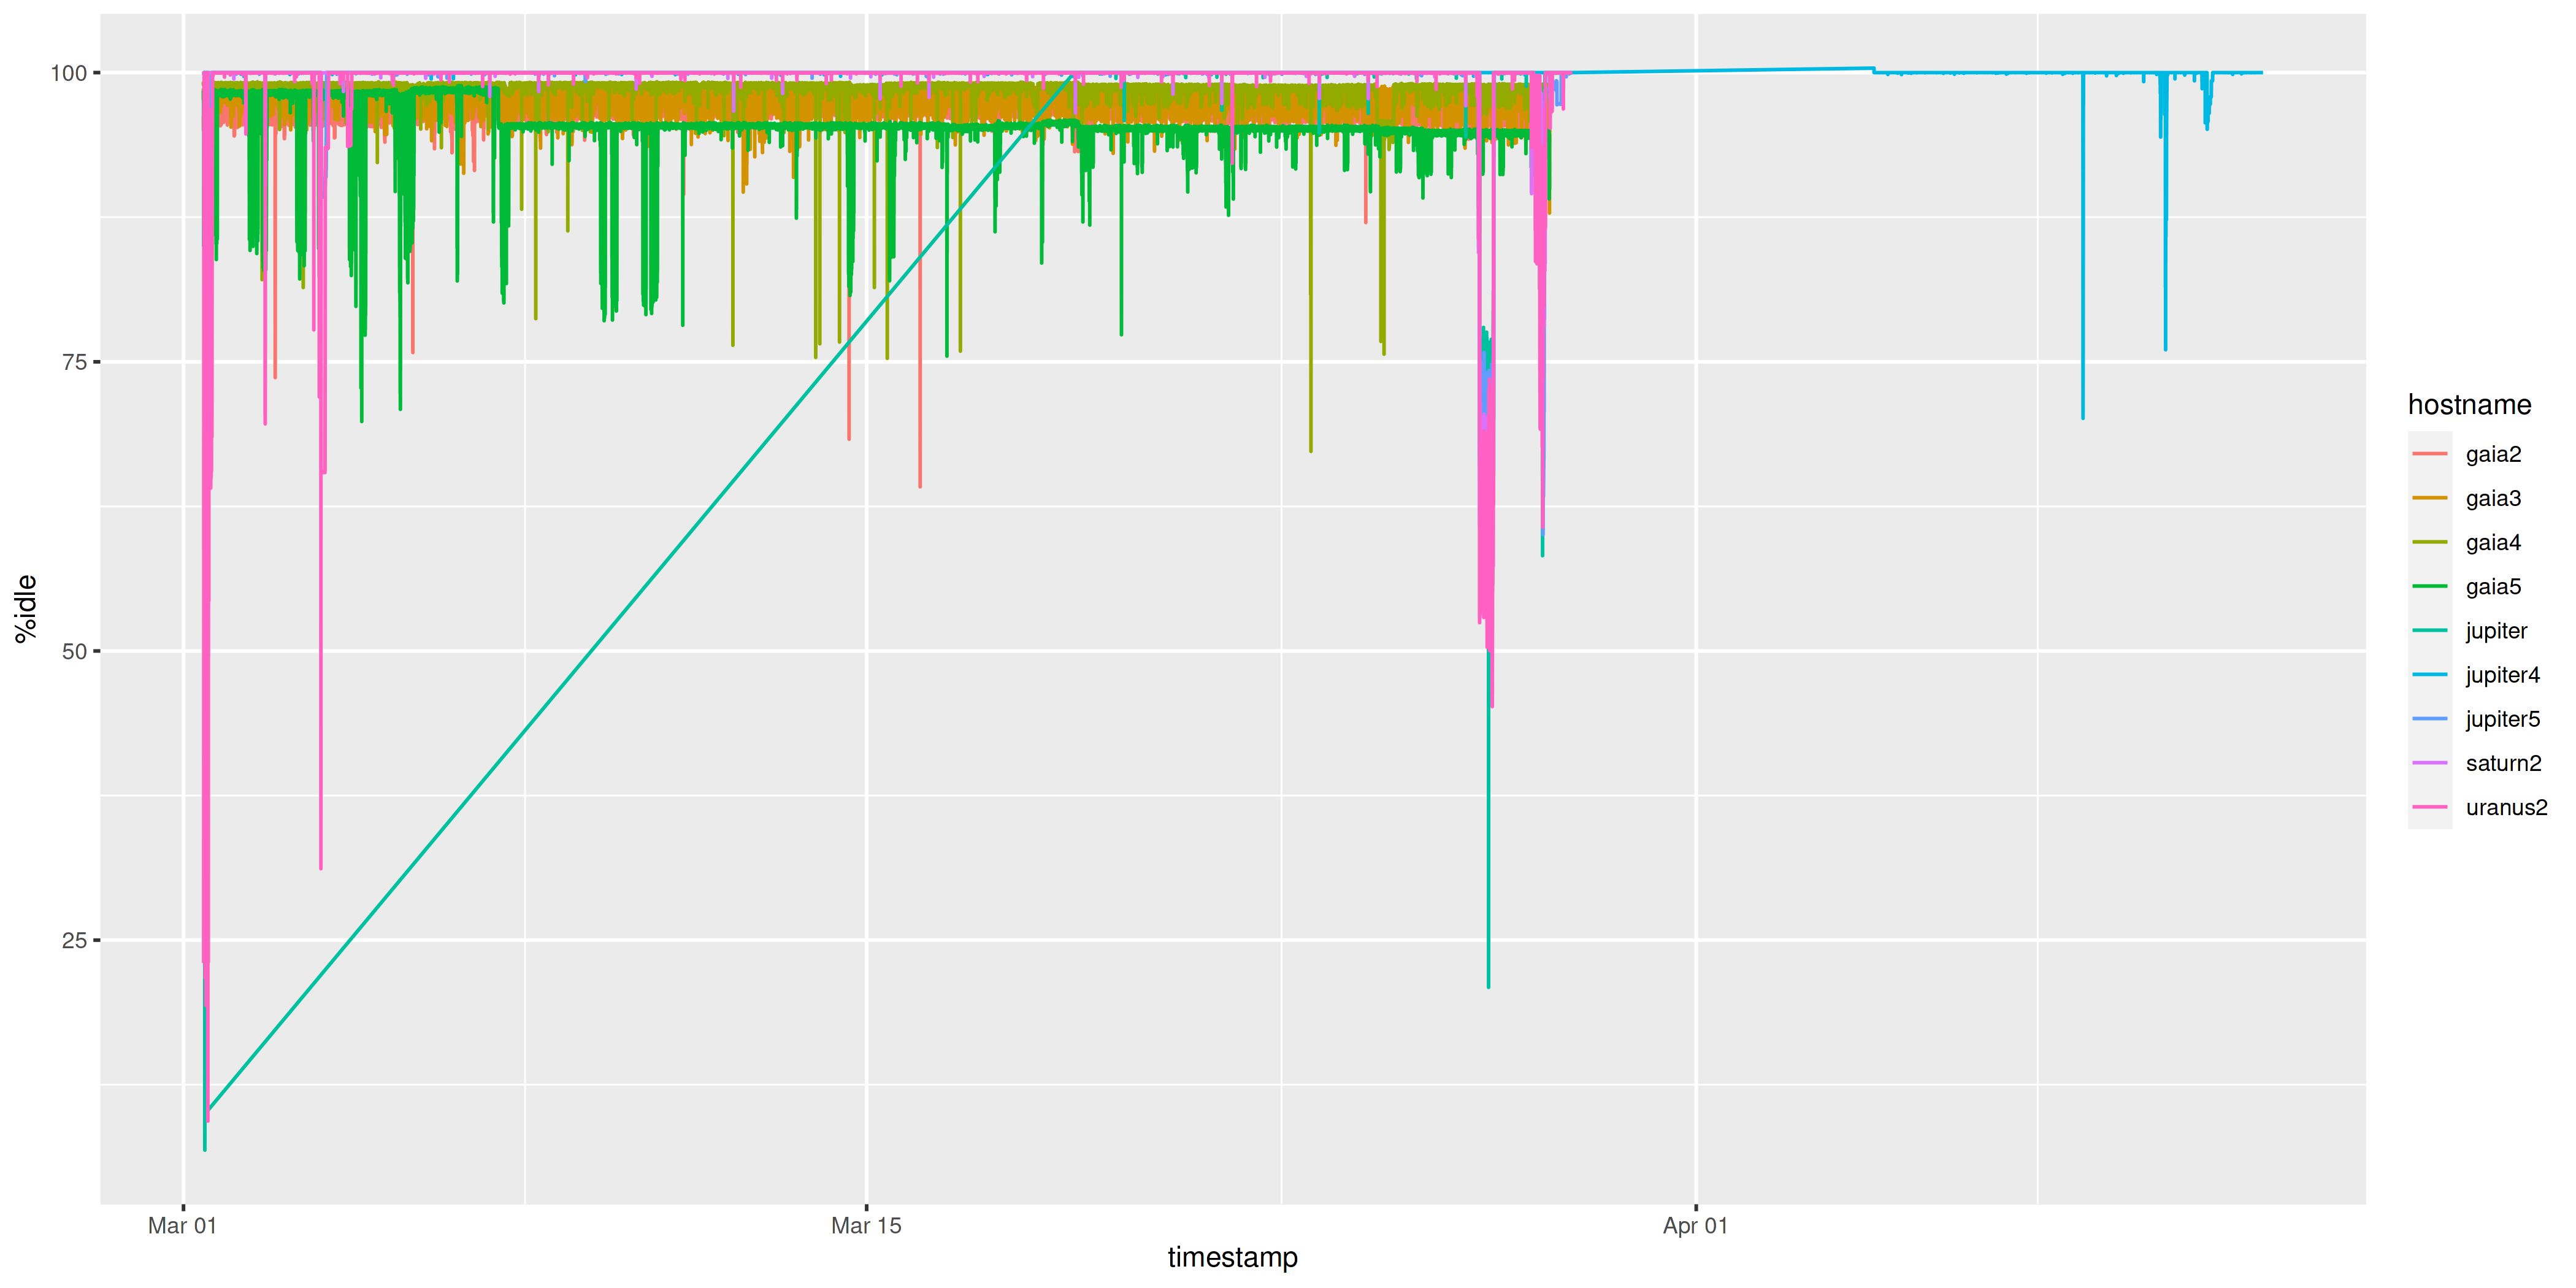

In [31]:
cpu %>%
    ggplot(aes(x=timestamp, y=`%idle`, color=hostname)) + geom_line()

In [19]:
cpu2<-cpu%>%
filter(timestamp<lubridate::ymd("2024-03-31"))

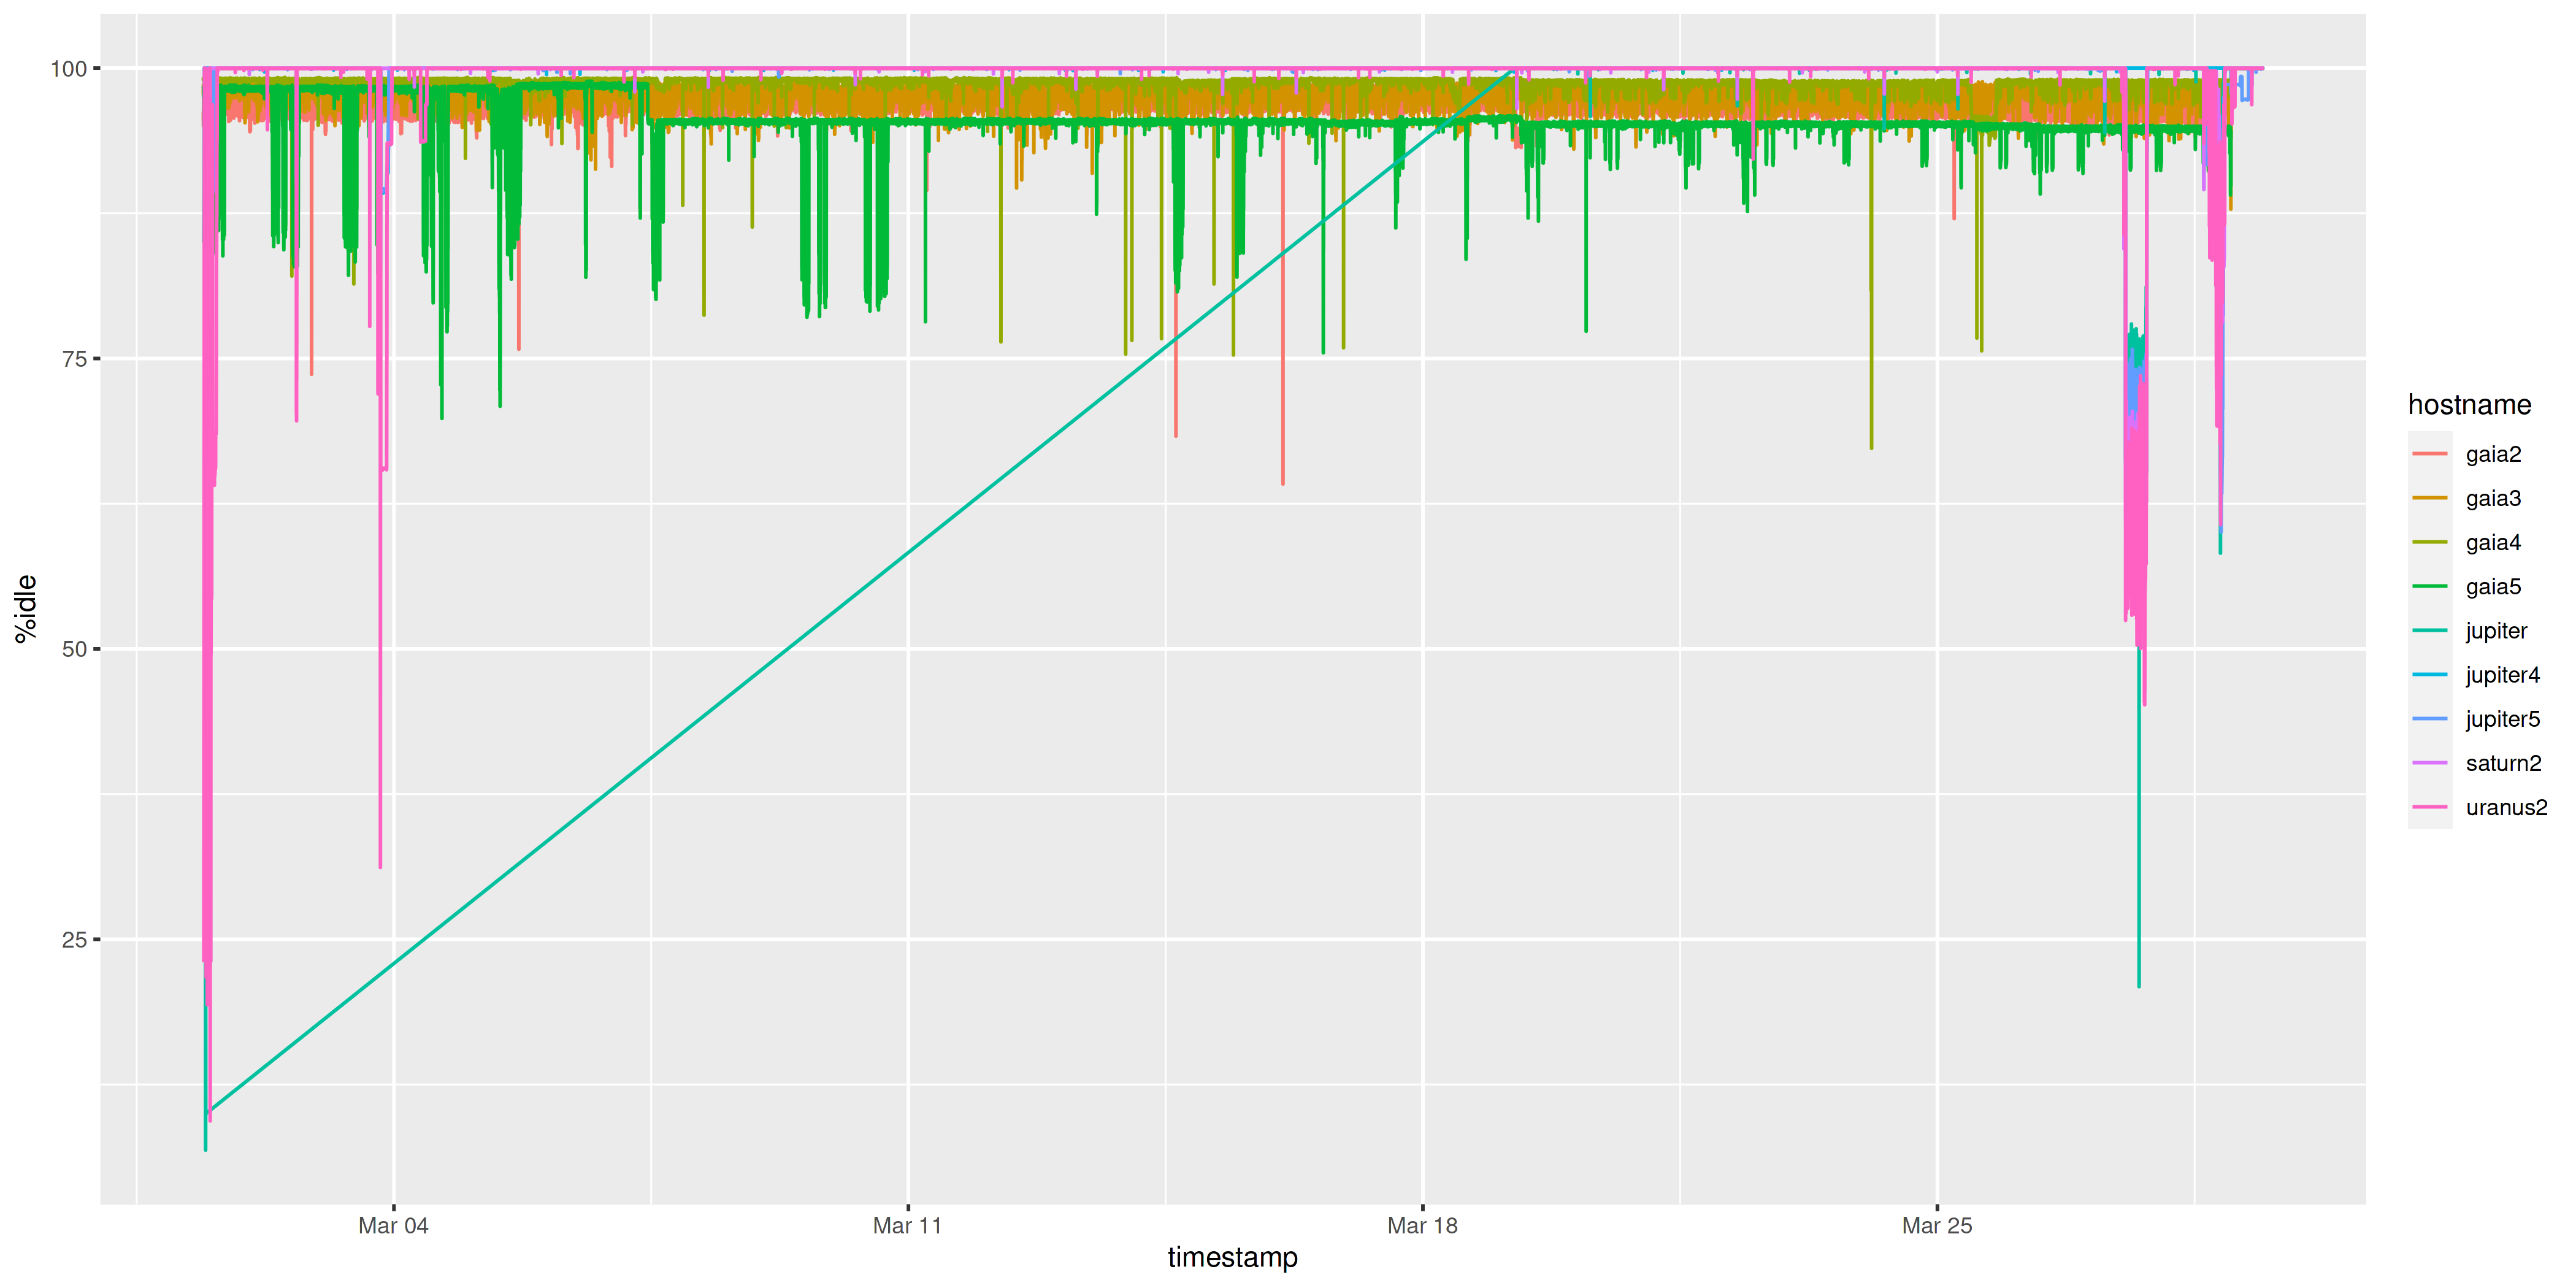

In [30]:
cpu2 %>%
    ggplot(aes(x=timestamp, y=`%idle`, color=hostname)) + geom_line()

In [21]:
summary(cpu2$timestamp)

                      Min.                    1st Qu. 
"2024-03-01 09:45:25.0000" "2024-03-08 16:06:26.0000" 
                    Median                       Mean 
"2024-03-15 22:27:27.0000" "2024-03-15 16:42:06.9877" 
                   3rd Qu.                       Max. 
"2024-03-22 18:14:46.0000" "2024-03-29 10:20:05.0000" 

In [41]:
cpu3 <- cpu2 %>%
    group_by(hostname, lubridate::day(timestamp)) %>%
    summarize(idle=min(`%idle`))

`summarise()` has grouped output by 'hostname'. You can override using the
`.groups` argument.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


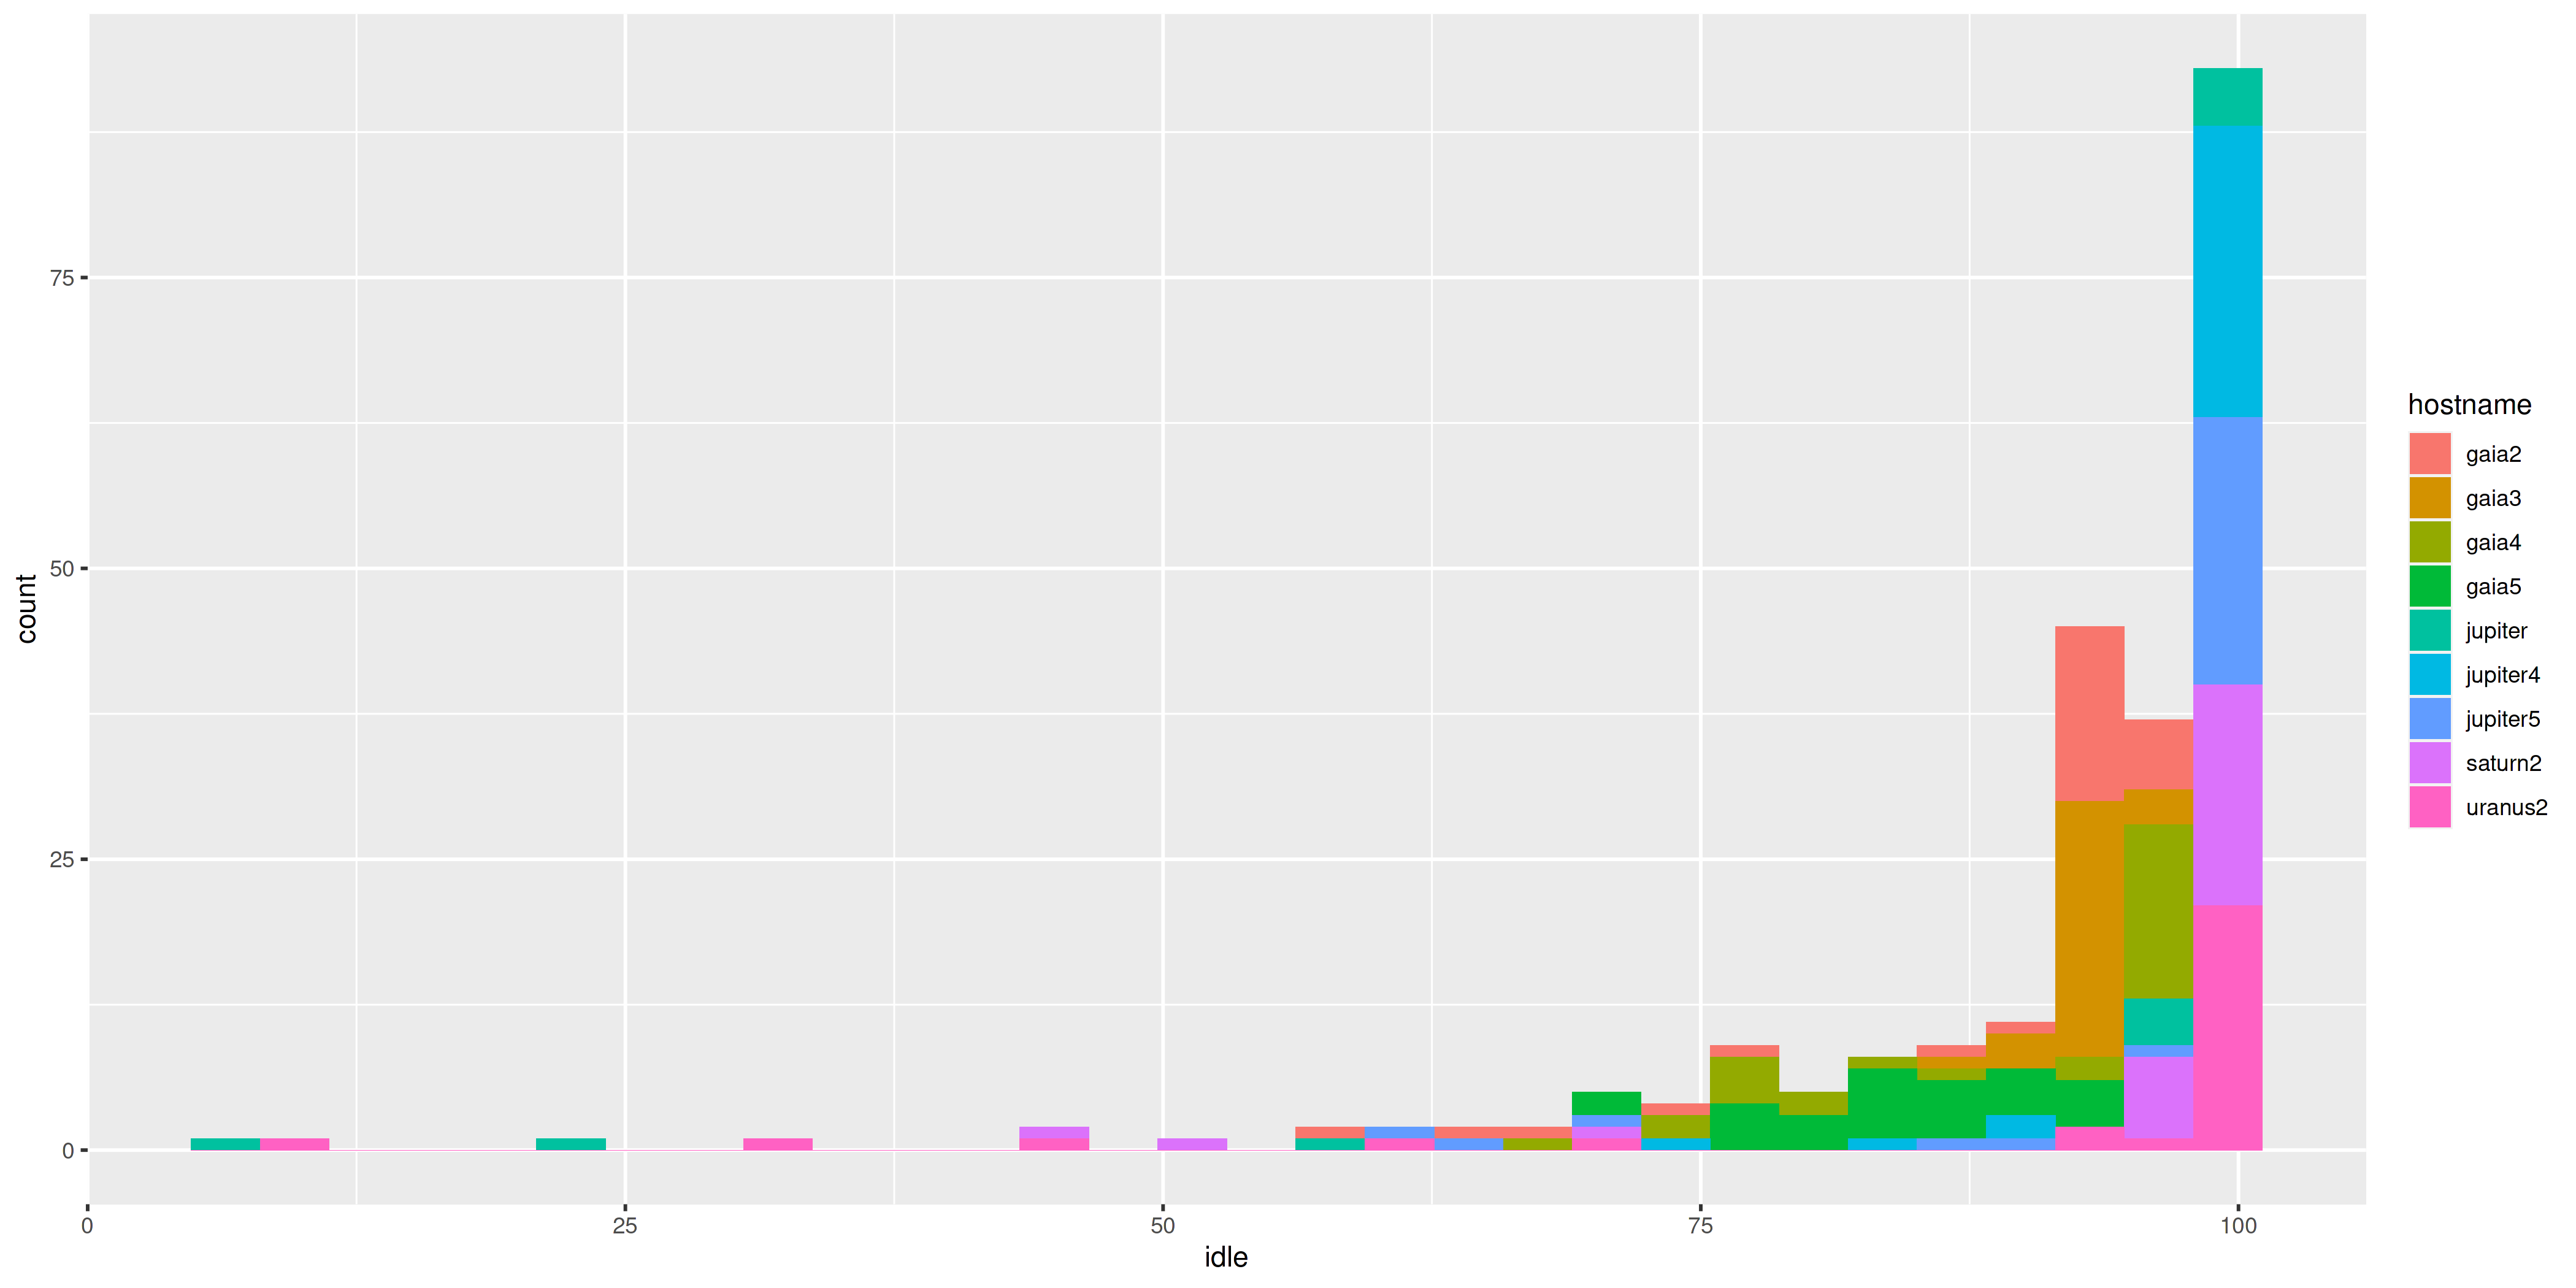

In [47]:
cpu3%>%
ggplot(aes(x=idle,fill=hostname))+
geom_histogram()

In [49]:
cpu3  %>%
    filter(idle>75 & idle<90)

hostname,lubridate::day(timestamp),idle
<chr>,<int>,<dbl>
gaia2,5,75.80
gaia2,11,89.48
gaia2,25,87.04
gaia3,12,89.67
gaia3,28,87.86
gaia4,2,82.10
gaia4,3,81.42
gaia4,7,88.19
gaia4,8,78.73


In [51]:
library(lubridate)

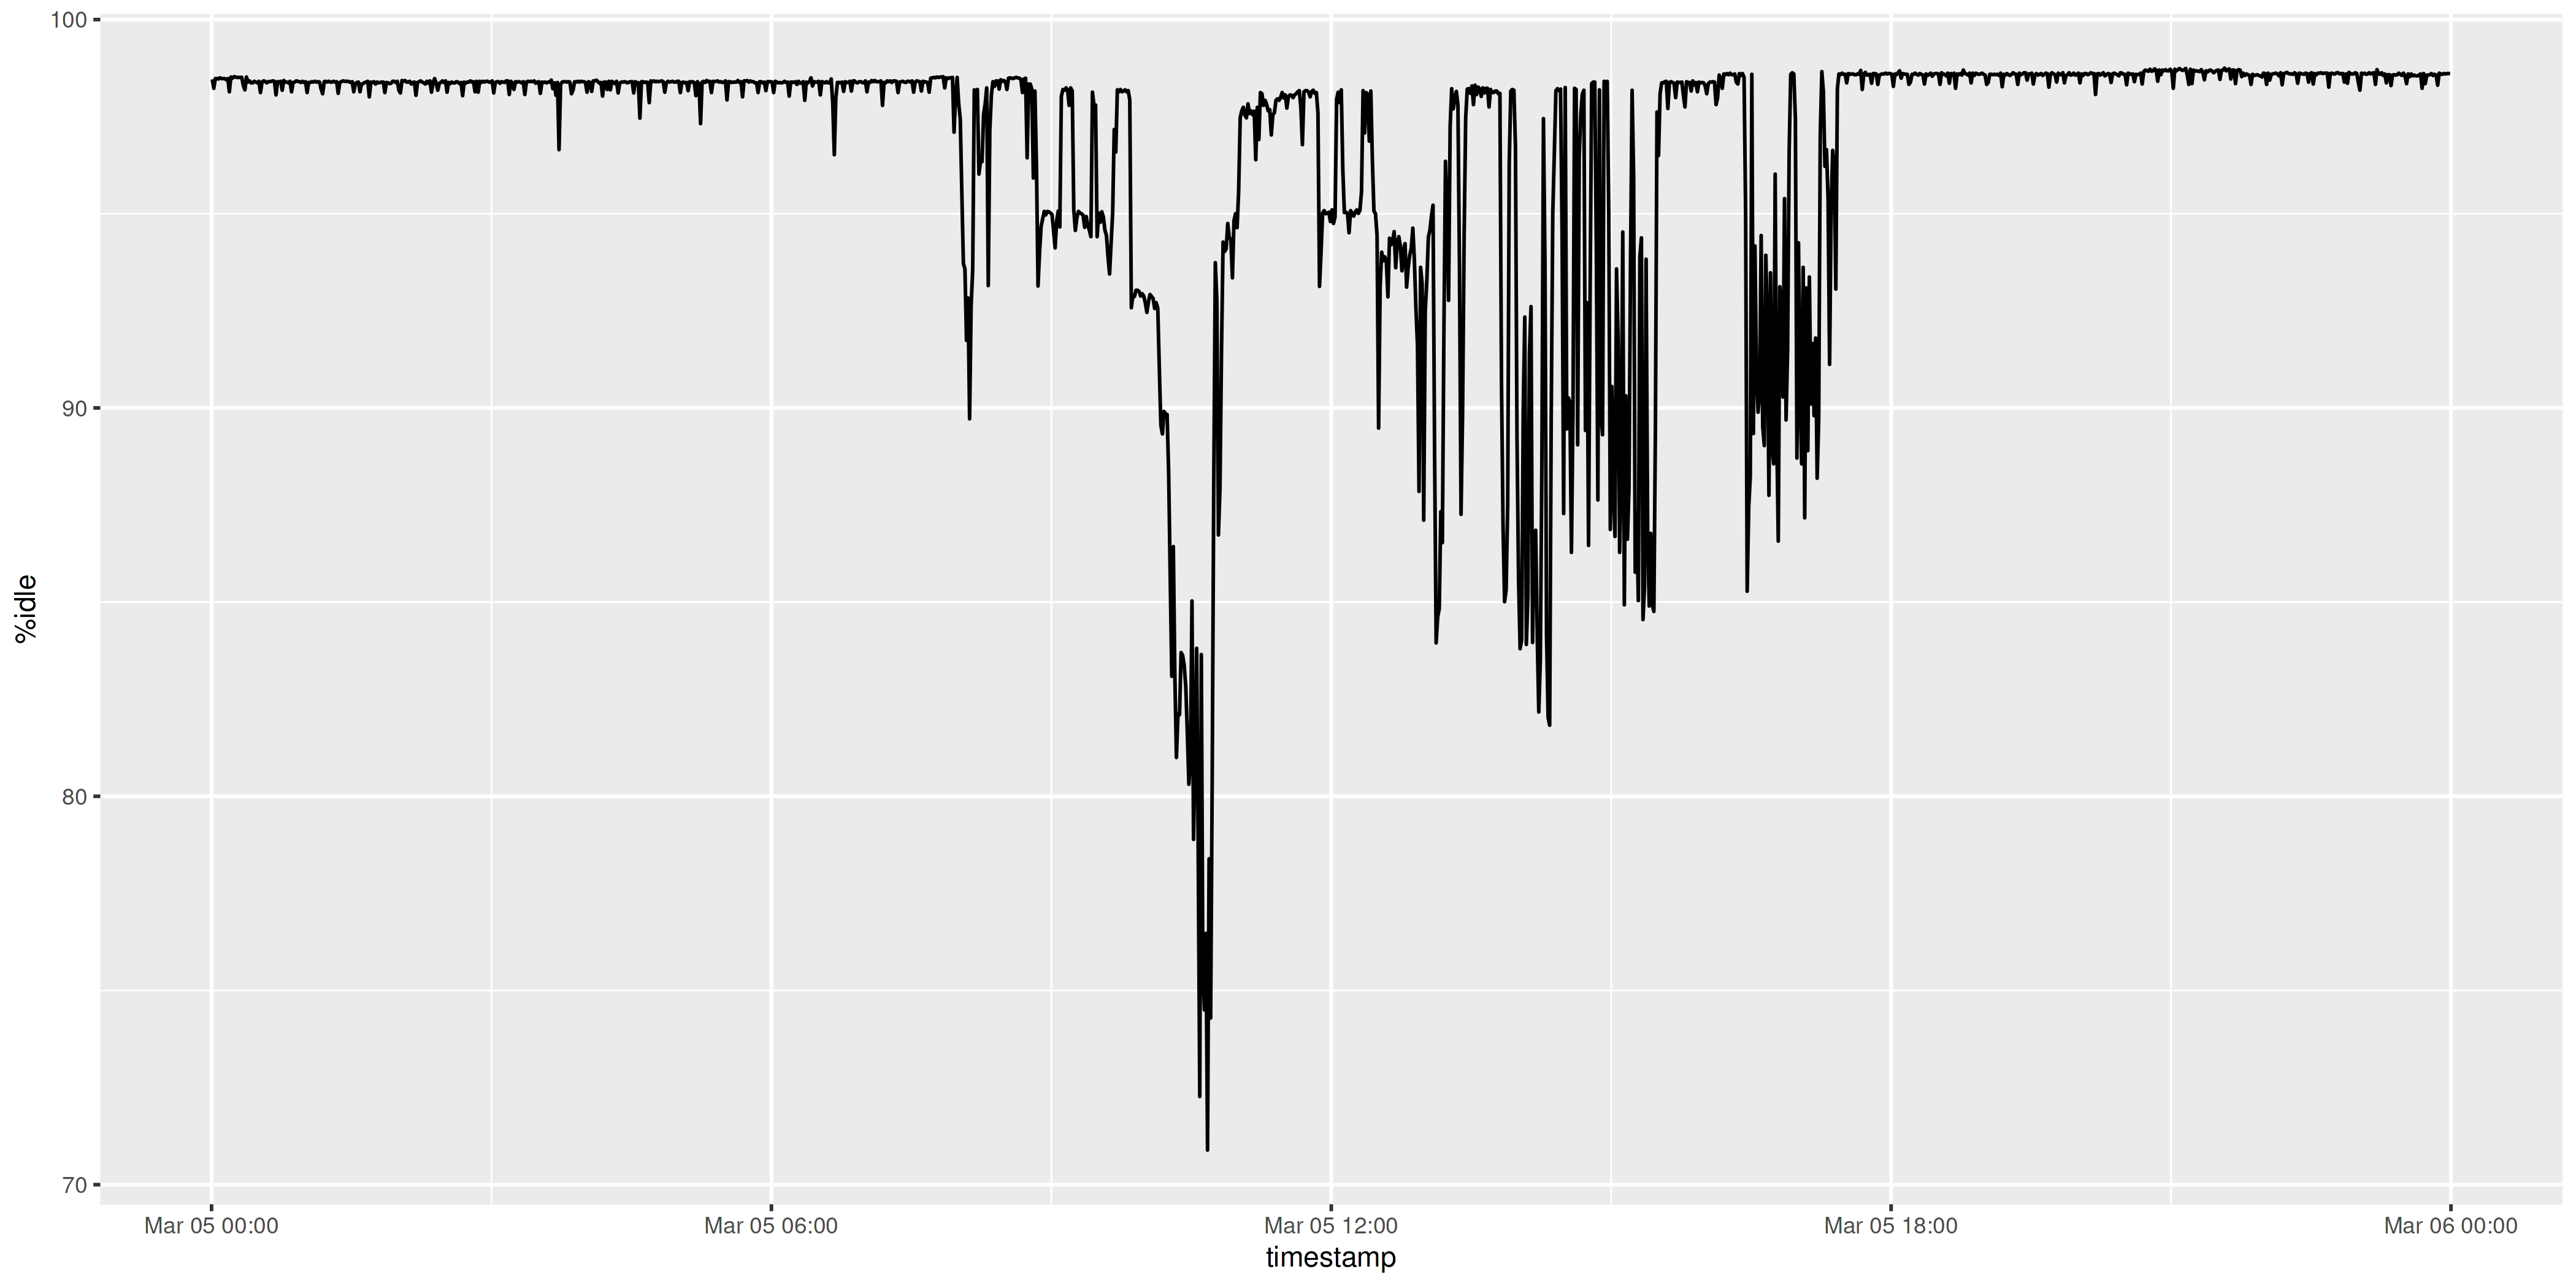

In [57]:
cpu2 %>%
    mutate(d=day(timestamp)) %>%
    filter(hostname=="gaia5", d==5) %>%
    ggplot(aes(x=timestamp, y=`%idle`)) + geom_line()

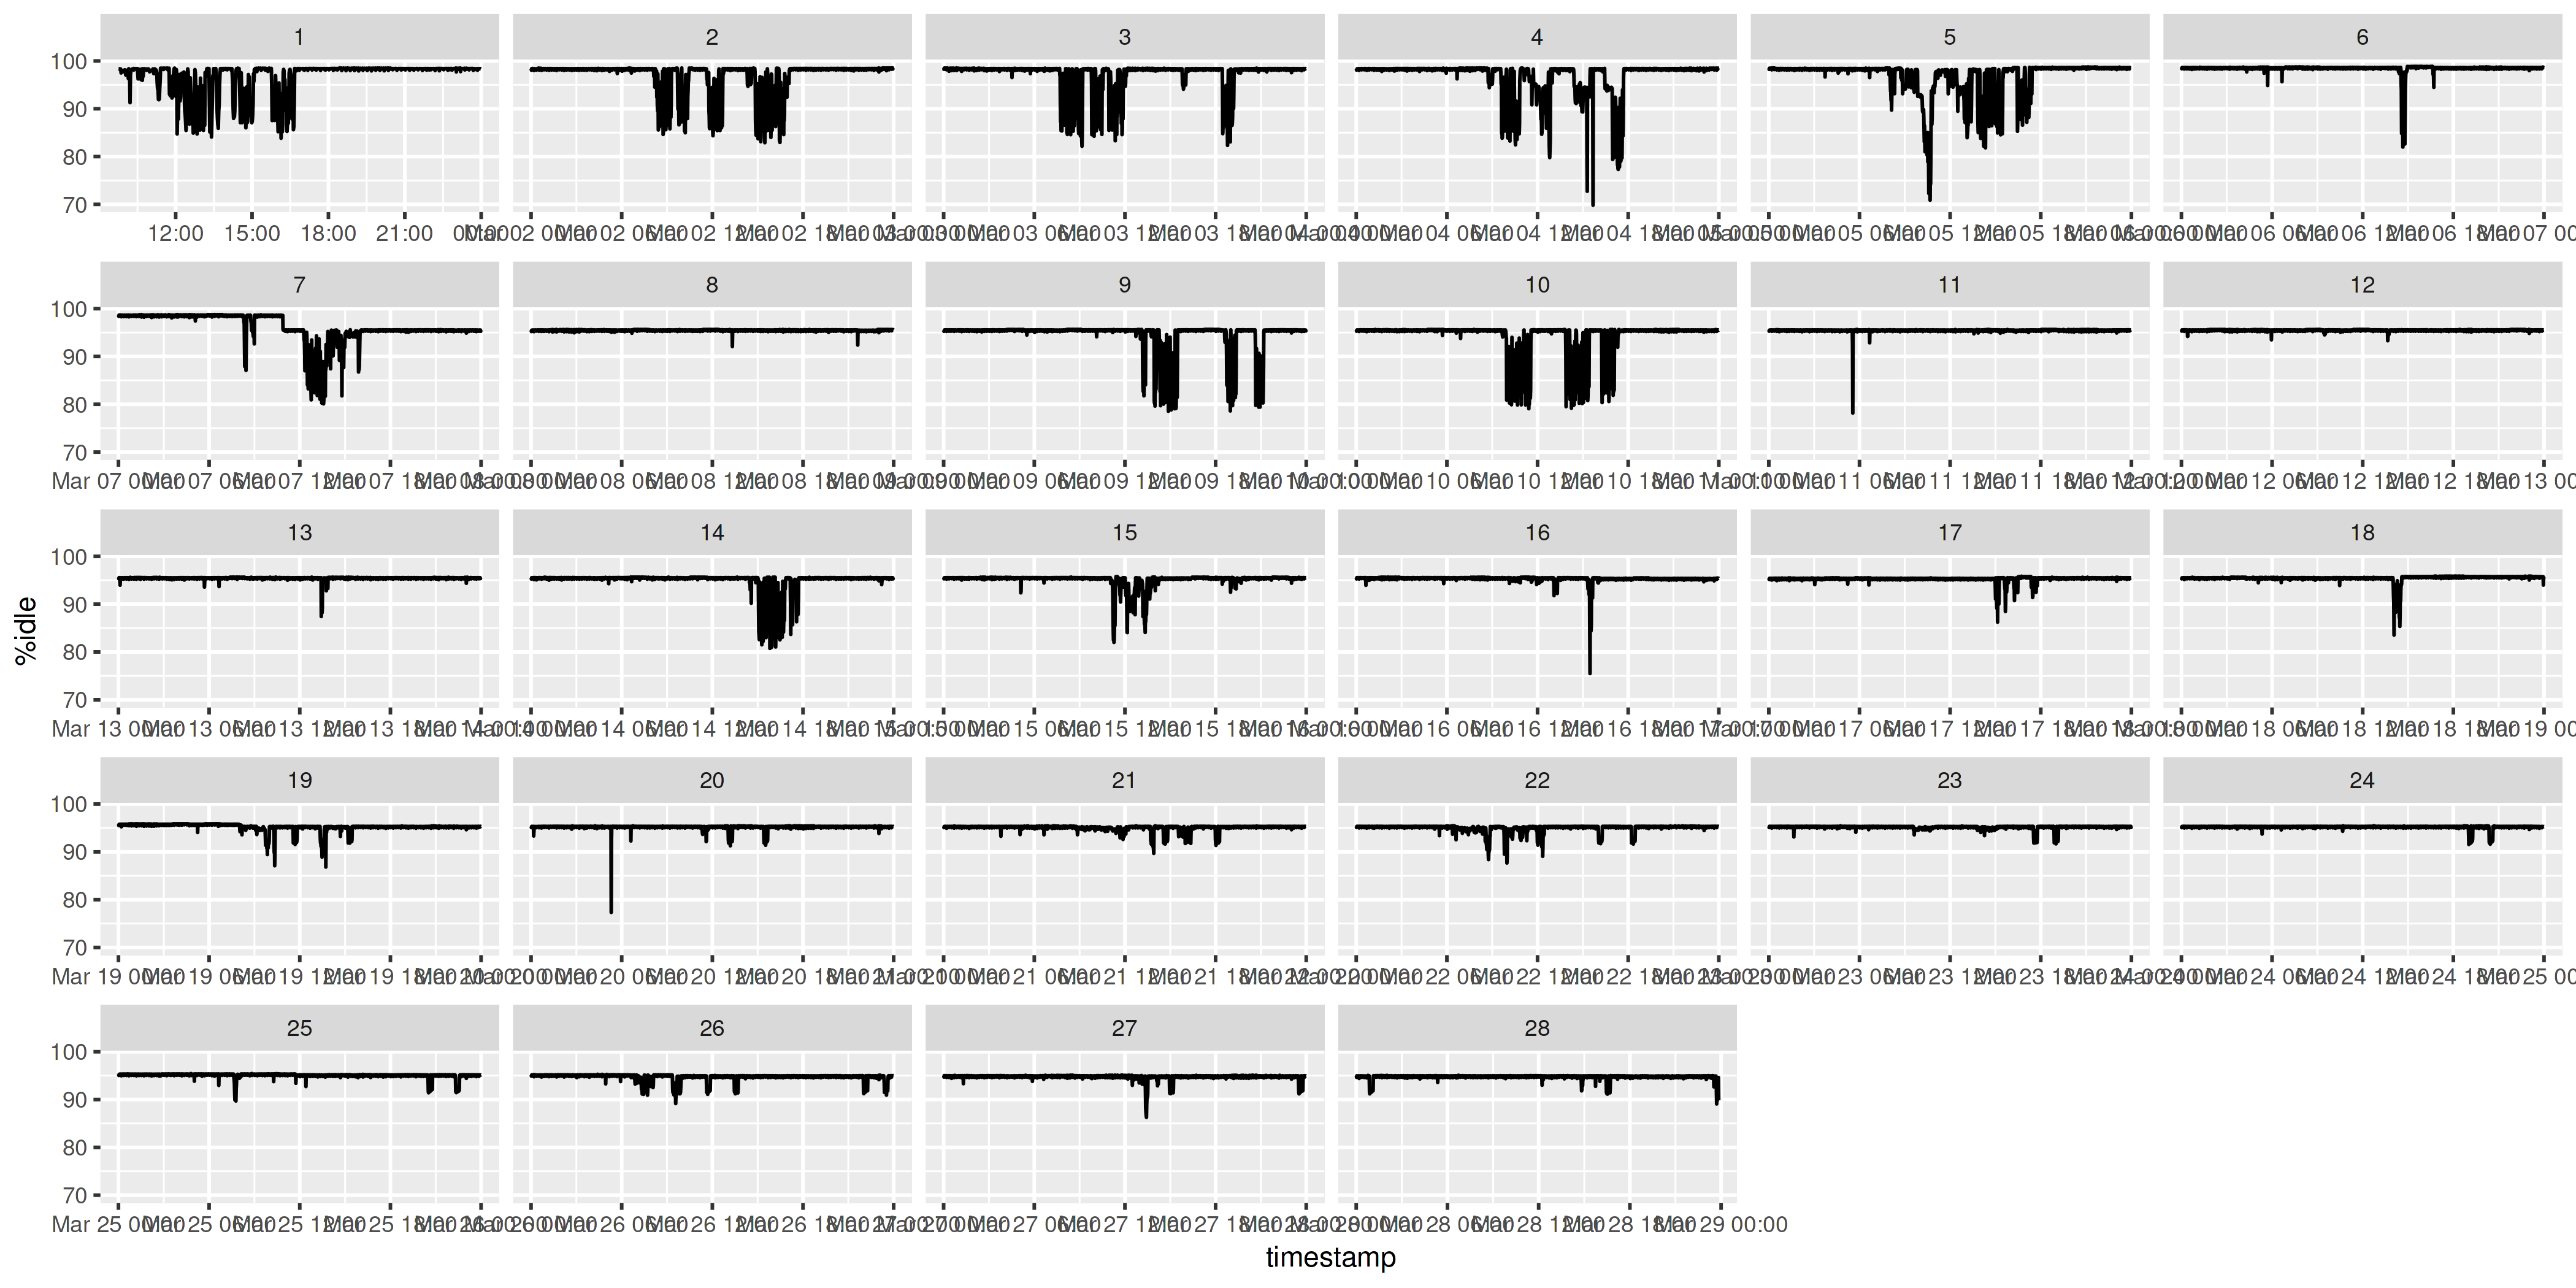

In [61]:
cpu2 %>%
    mutate(d=day(timestamp)) %>%
    filter(hostname=="gaia5") %>%
    ggplot(aes(x=timestamp, y=`%idle`)) + geom_line() + facet_wrap(d~., scales="free_x")

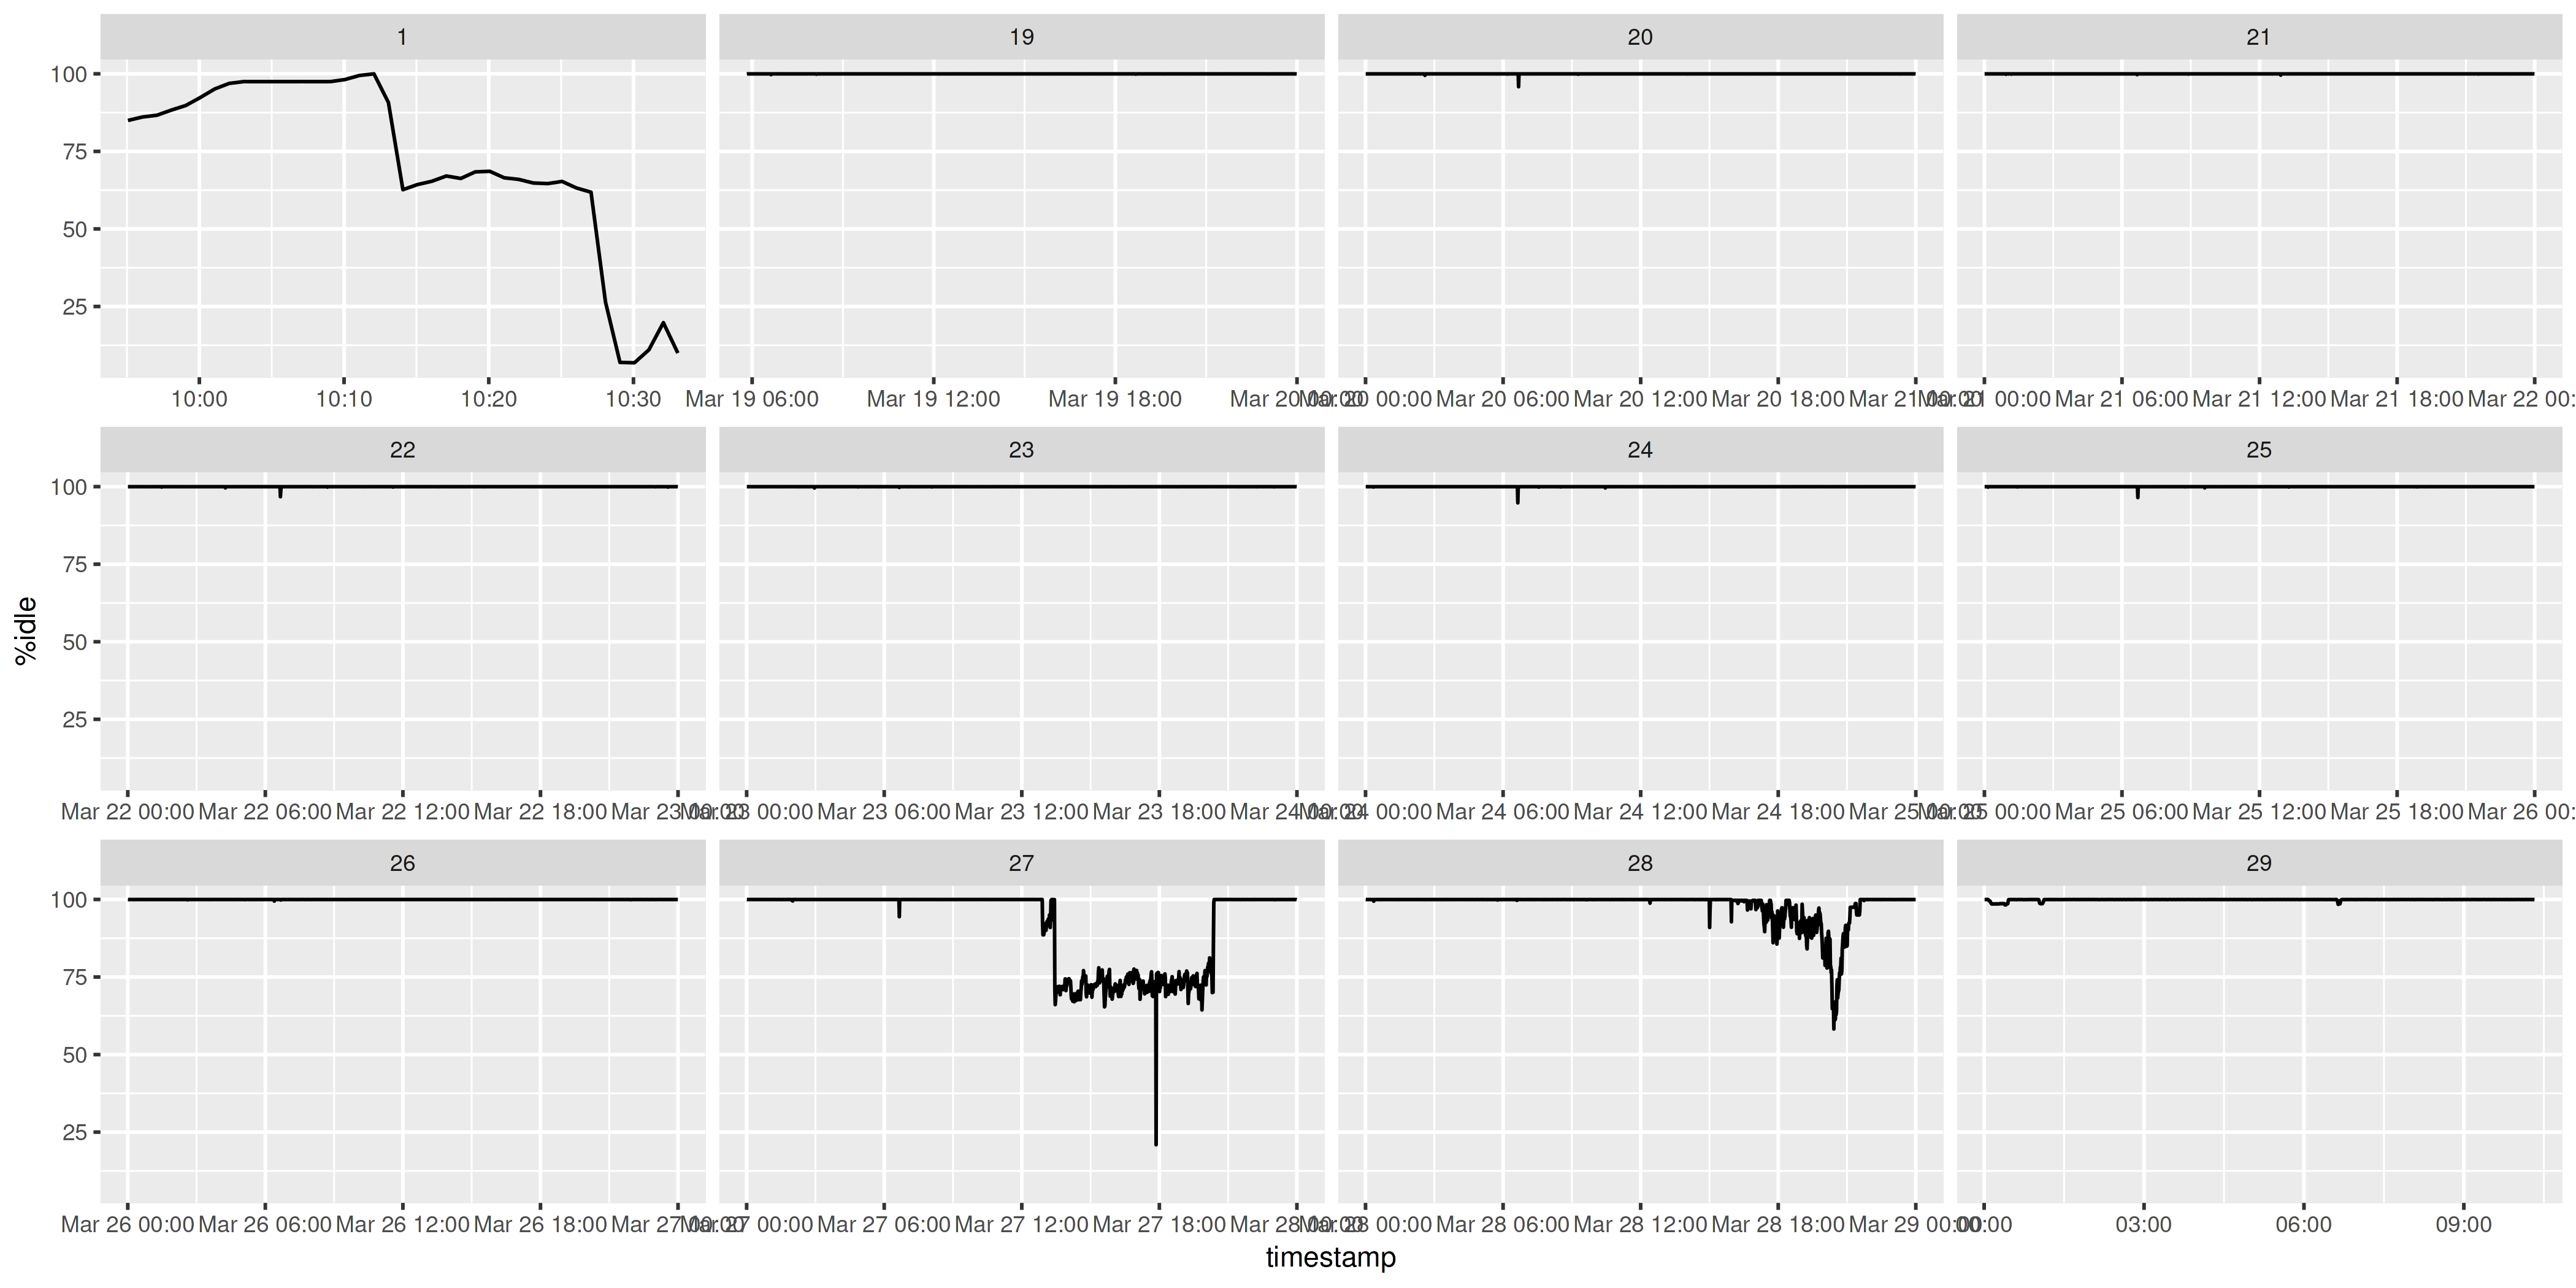

In [66]:
cpu2 %>%
    mutate(d=day(timestamp)) %>%
    filter(hostname=="jupiter") %>%
    ggplot(aes(x=timestamp, y=`%idle`)) + geom_line() + facet_wrap(d~., scales="free_x")

In [0]:
cpu2 %>%
    mutate(d=day(timestamp)) %>%
    filter(hostname=="jupiter") %>%
    ggplot(aes(x=timestamp, y=`%idle`)) + geom_line() + facet_wrap(d~., scales="free_x")

In [67]:
mem <- read_tsv("mem.tsv") %>% mutate(timestamp = ymd_hms(timestamp))

Rows: 346229 Columns: 14


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): hostname, timestamp
dbl (12): interval, kbmemfree, kbavail, kbmemused, %memused, kbbuffers, kbca...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [68]:
mem2<-mem %>%
   filter(timestamp<lubridate::ymd("2024-03-31"))%>%
filter(hostname=="jupiter") 

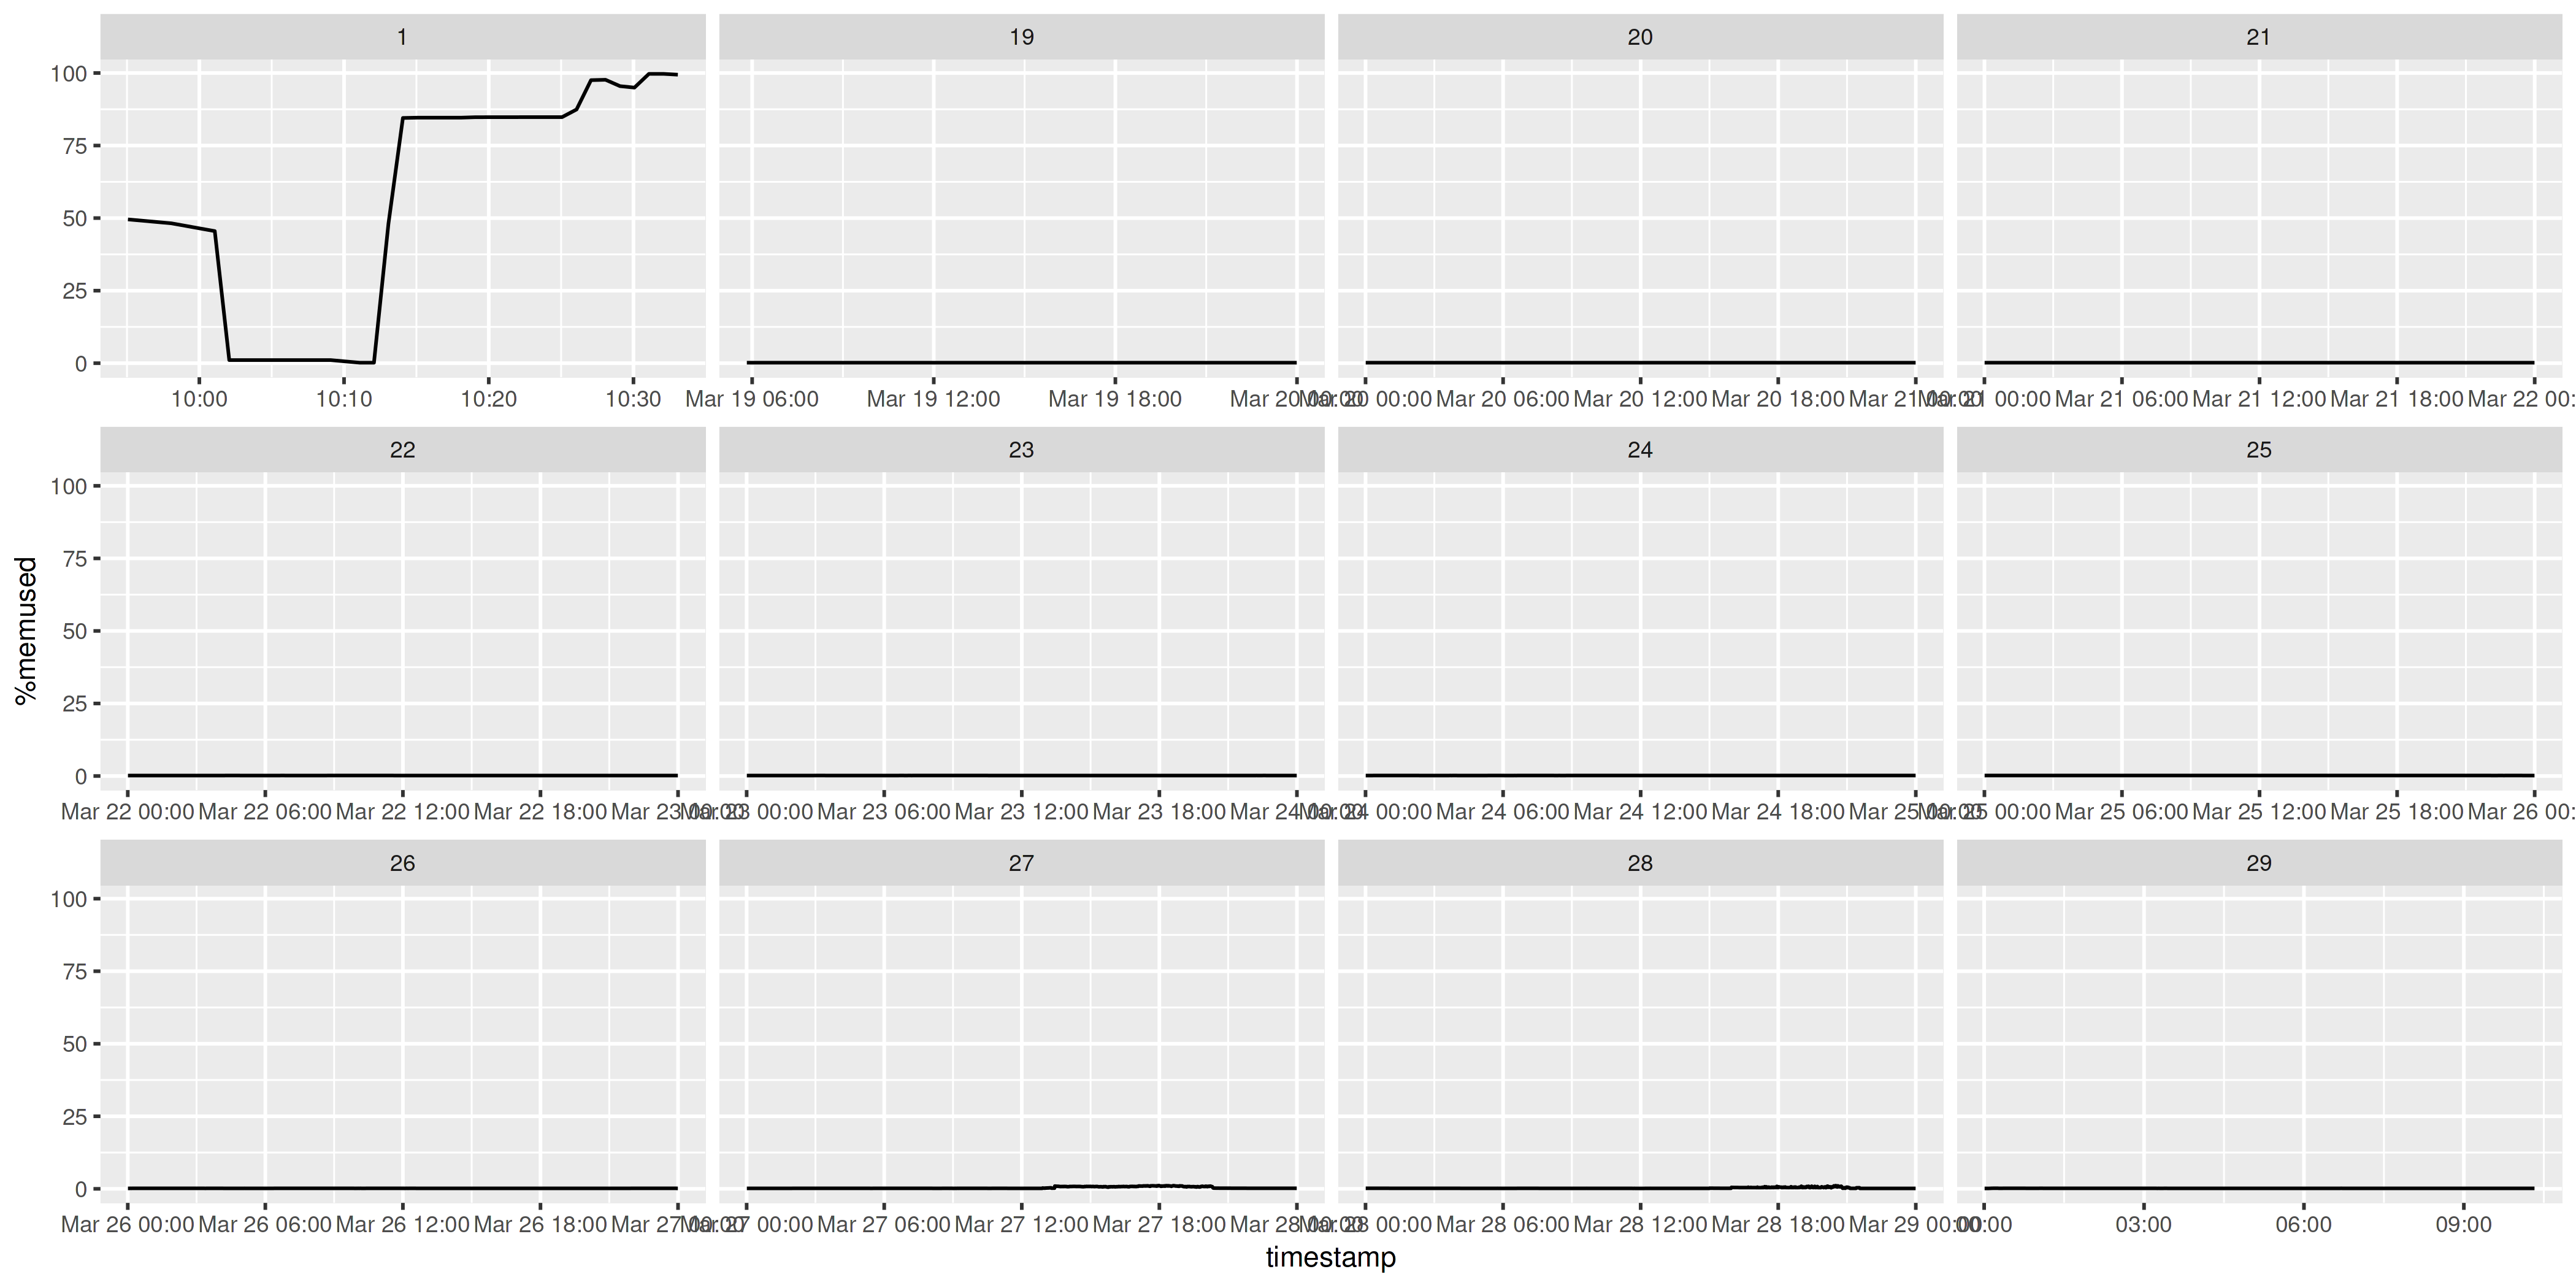

In [71]:
mem2%>%
    mutate(d=day(timestamp))%>%
    ggplot(aes(x=timestamp, y=`%memused`)) + geom_line() + facet_wrap(d~., scales="free_x")